In [1]:
%load_ext autoreload
%autoreload 2

# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pyshtools as pysh
import SLmod as SL
from numpy import pi as pi

#set plotting parameters
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [16, 8]

# get values for some physical parameters
b = SL.b
g = SL.g
rhoi = SL.rhoi
rhow = SL.rhow

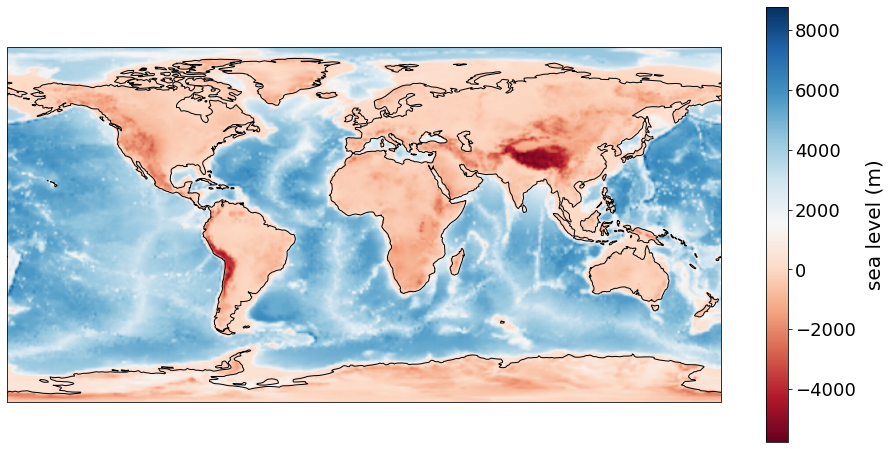

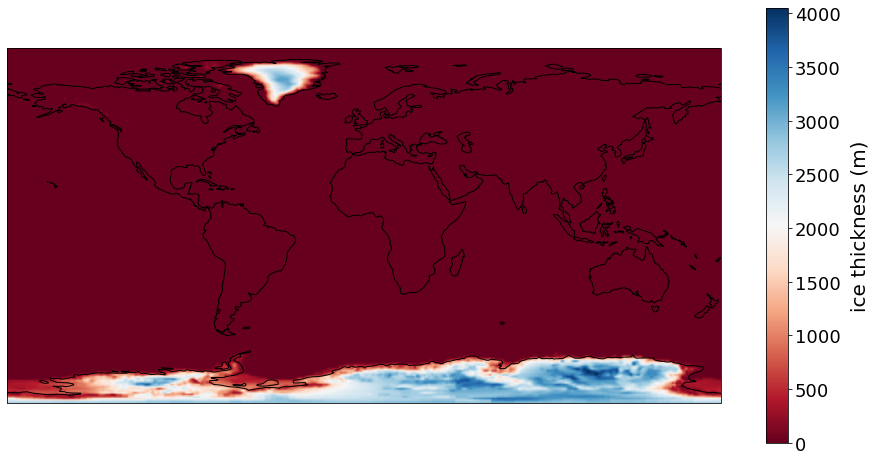

fraction of surface which is ocean =  0.712960233719624


In [2]:
# set the truncation degree
L=256

# read in the present day sea level and ice thickness
sl0,ice0 = SL.get_sl_ice_data(L)

# plot these fields
SL.plot(sl0,label = 'sea level (m)')
SL.plot(ice0,label = 'ice thickness (m)')

# compute the ocean function
C = SL.ocean_function(sl0,ice0)

# work out the ocean area and check the value
A = SL.surface_integral(C)
A_earth = 4*pi*b**2
print('fraction of surface which is ocean = ',A/A_earth)

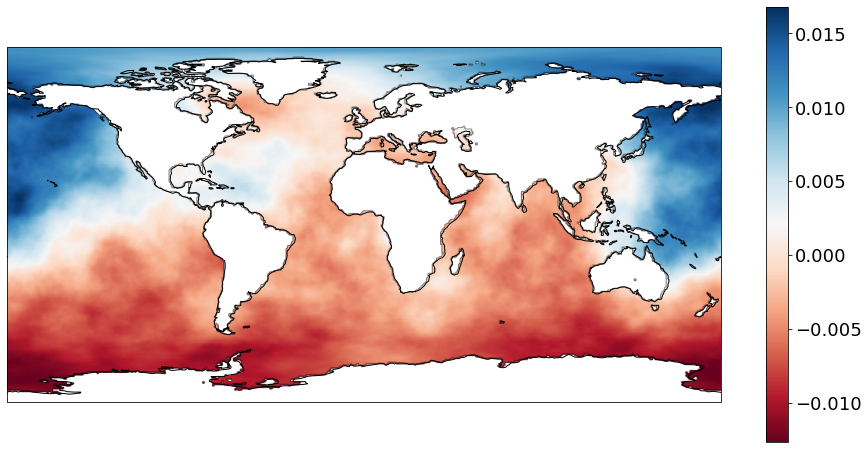

iteration =  1 relative change =  0.21508433910273422
iteration =  2 relative change =  0.04619285678850847
iteration =  3 relative change =  0.009997114076868535
iteration =  4 relative change =  0.0022000175203090353
iteration =  5 relative change =  0.0004967807355833809
iteration =  6 relative change =  0.00011615450904380265
iteration =  7 relative change =  2.8345772683654734e-05
iteration =  8 relative change =  7.259047977398363e-06
iteration =  9 relative change =  1.9530080999134548e-06
iteration =  10 relative change =  5.775791498641445e-07
iteration =  11 relative change =  1.769854407824713e-07
iteration =  12 relative change =  5.518016885502532e-08
iteration =  13 relative change =  1.7418316583341733e-08
iteration =  14 relative change =  5.5461584004112276e-09


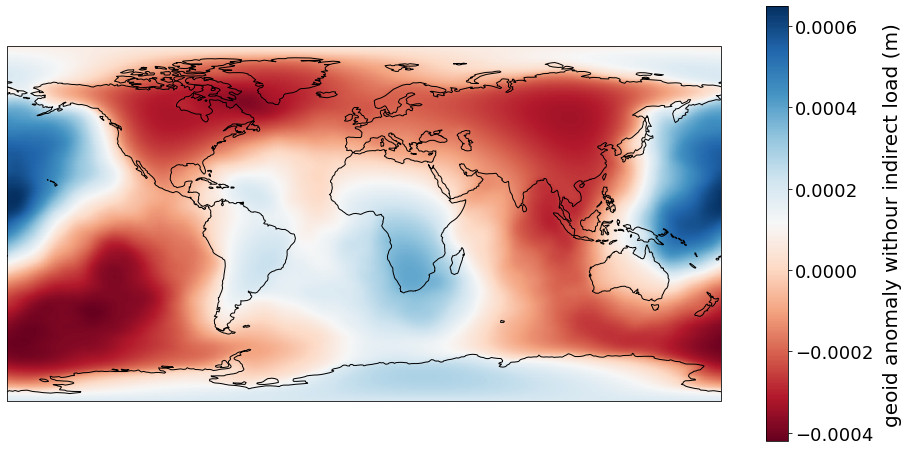

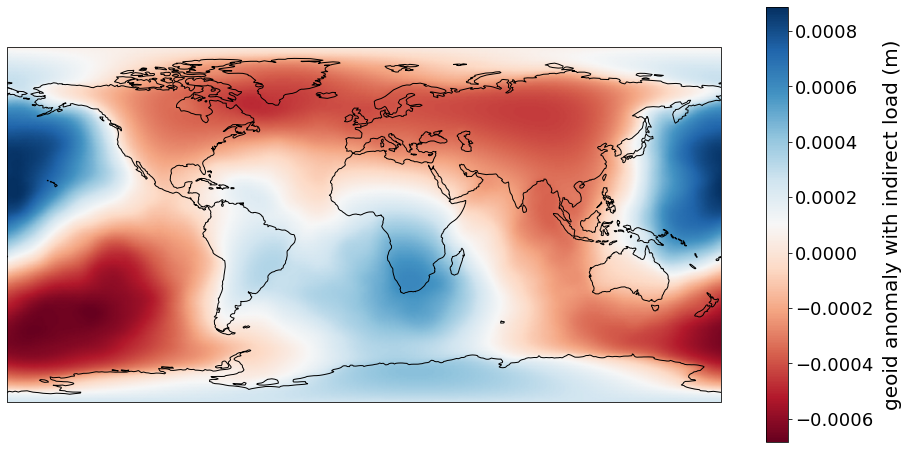

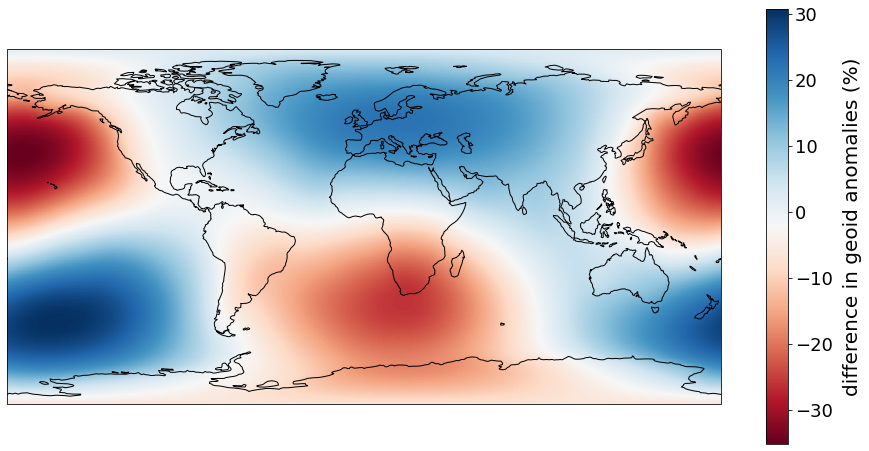

GRACE average of load =  -0.0024900805459724842
true average of load  =  -0.004604256726372712
relative difference   =  -45.91786049397382 %
iteration =  1 relative change =  0.02646619629302368
iteration =  2 relative change =  0.0010263956614979966
iteration =  3 relative change =  6.985963357173416e-05
iteration =  4 relative change =  8.461493188162714e-06
iteration =  5 relative change =  1.5317579561095216e-06
iteration =  6 relative change =  3.5056393649335457e-07
iteration =  7 relative change =  8.793257187937563e-08
iteration =  8 relative change =  2.33544821832878e-08
iteration =  9 relative change =  6.488576775353007e-09


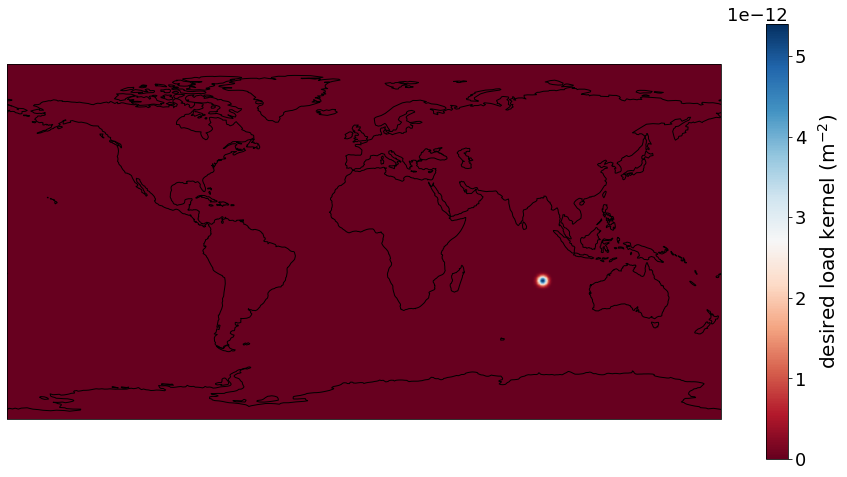

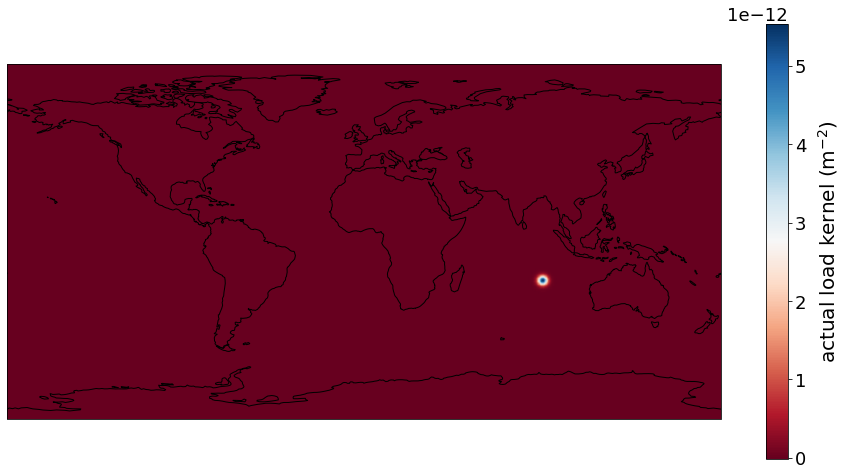

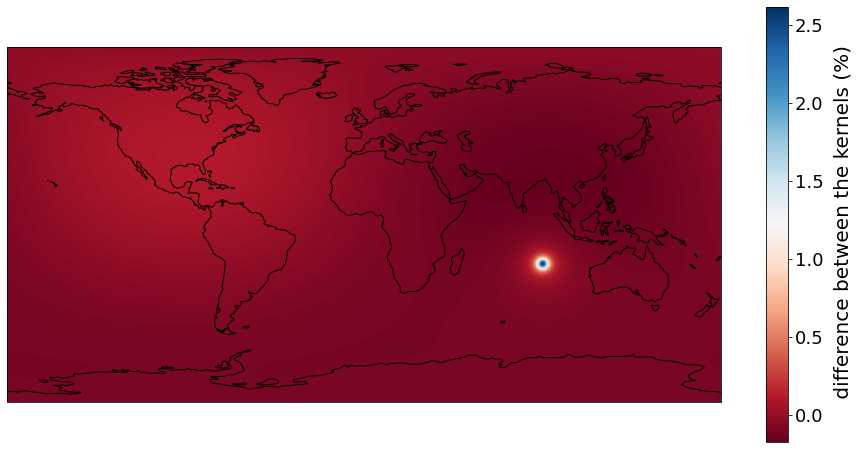

GRACE average of load =  -0.002711468037043749
true average of load  =  -0.004789985405788254
relative difference   =  -43.39297915673833 %
iteration =  1 relative change =  0.06932049435084983
iteration =  2 relative change =  0.006169167988460908
iteration =  3 relative change =  0.0007381707130824566
iteration =  4 relative change =  0.00011700677730309447
iteration =  5 relative change =  2.328018168310066e-05
iteration =  6 relative change =  5.386383624220119e-06
iteration =  7 relative change =  1.3535613720385164e-06
iteration =  8 relative change =  3.597634117071614e-07
iteration =  9 relative change =  9.999022087005844e-08
iteration =  10 relative change =  2.9322832558099156e-08
iteration =  11 relative change =  8.866137459771034e-09


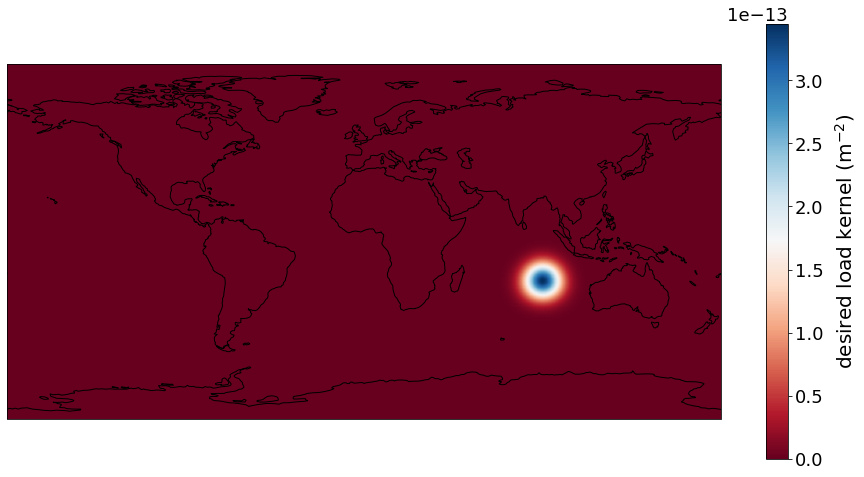

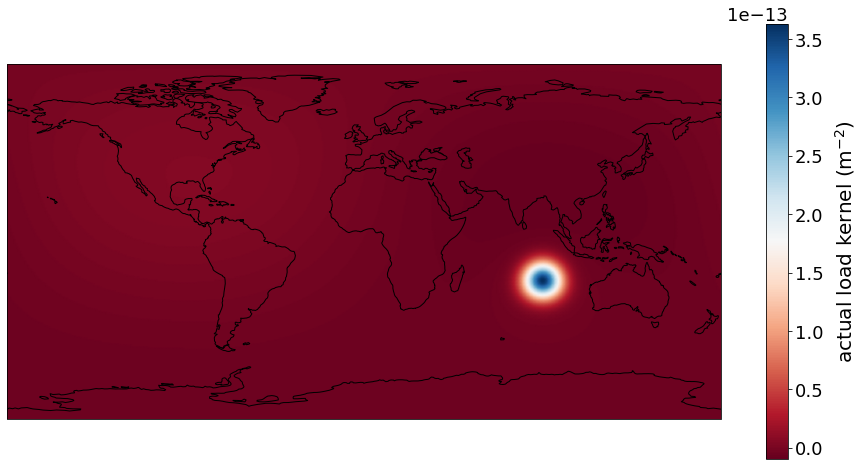

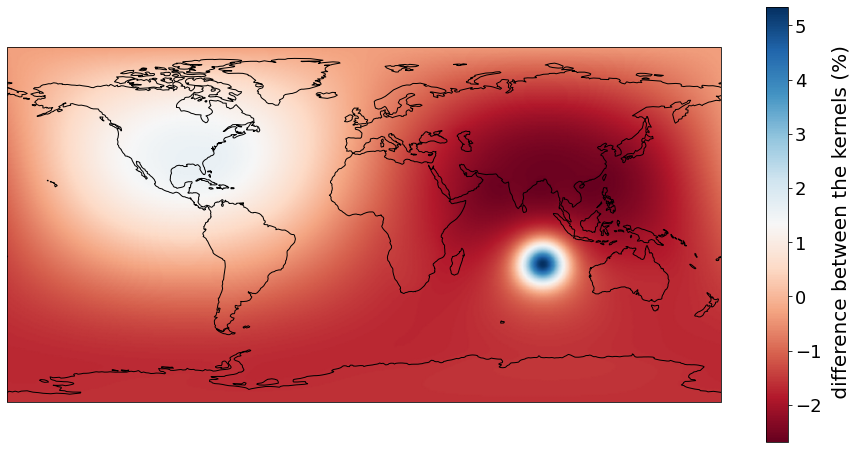

In [3]:
# make a random ocean load
ocean_mask = SL.ocean_mask(sl0,ice0)
Q = SL.sobolev_covariance(L,std = 0.01,s = 2,mu = 1.)
zeta_dyn = SL.random_ocean_load(C,Q)
sl_dyn = zeta_dyn/SL.rhow
SL.plot(ocean_mask*sl_dyn)

# compute the simplified response
_,phi_dir = SL.loading_response(zeta_dyn)


# compute the response
g = SL.g
sl_hyd,u_hyd,phi_hyd,om_hyd,psi_hyd = SL.fingerprint(C,zeta_dyn)
SL.plot(-(1/g)*phi_dir,label = r'geoid anomaly withour indirect load (m)')
SL.plot(-(1/g)*phi_hyd,label = r'geoid anomaly with indirect load (m)')
norm = np.max(np.abs(phi_hyd.data))
SL.plot(100*(phi_hyd-phi_dir)/norm,label = 'difference in geoid anomalies (%)')


# set the averaging function
w = SL.gaussian_averaging_function(L,r = 200,lat0 = -20.,lon0 = 90.)

# compute the true and GRACE average
true_average = SL.surface_integral(w*zeta_dyn)/SL.rhow
GRACE_average = SL.GRACE_average_measurement(phi_hyd,w,LT = 0)/SL.rhow

print('GRACE average of load = ',GRACE_average)
print('true average of load  = ',true_average)
print('relative difference   = ',100*(GRACE_average-true_average)/true_average,'%')

# form the adjoint loads
zeta_d, zeta_u_d, zeta_phi_d, kk_d  = SL.GRACE_average_load(w,LT = 0)

# solve the adjoint problem
sl_d,_,_,_,_ = SL.generalised_fingerprint(C,zeta_d,zeta_u_d,zeta_phi_d,kk_d)


# plot the kernel wrt zeta
SL.plot(w,label = r'desired load kernel (m$^{-2}$)')
SL.plot(sl_d,label = r'actual load kernel (m$^{-2}$)')

# plot the kernel wrt zeta
norm = np.max(np.abs(w.data[:,:]))
SL.plot(100*(sl_d-w)/norm,label = ' difference between the kernels (%)')


##########################################################
# now again with a wider average

# set the averaging function
w = SL.gaussian_averaging_function(L,r = 800,lat0 = -20.,lon0 = 90.)

# compute the true and GRACE average
true_average = SL.surface_integral(w*zeta_dyn)/SL.rhow
GRACE_average = SL.GRACE_average_measurement(phi_hyd,w,LT = 0)/SL.rhow

print('GRACE average of load = ',GRACE_average)
print('true average of load  = ',true_average)
print('relative difference   = ',100*(GRACE_average-true_average)/true_average,'%')

# form the adjoint loads
zeta_d, zeta_u_d, zeta_phi_d, kk_d  = SL.GRACE_average_load(w,LT = 0)

# solve the adjoint problem
sl_d,_,_,_,_ = SL.generalised_fingerprint(C,zeta_d,zeta_u_d,zeta_phi_d,kk_d)


# plot the kernel wrt zeta
SL.plot(w,label = r'desired load kernel (m$^{-2}$)')
SL.plot(sl_d,label = r'actual load kernel (m$^{-2}$)')

# plot the kernel wrt zeta
norm = np.max(np.abs(w.data[:,:]))
SL.plot(100*(sl_d-w)/norm,label = ' difference between the kernels (%)')

